In [2]:
import pandas as pd
from sklearn.model_selection import learning_curve,train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./UCI_Credit_Card.csv')

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
print(data.shape)

(30000, 25)


In [6]:
print(data.describe)

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
5          6    50000.0    1          1         2   37      0      0      0   
6          7   500000.0    1          1         2   29      0      0      0   
7          8   100000.0    2          2         2   23      0     -1     -1   
8          9   140000.0    2          3         1   28      0      0      2   
9         10    20000.0    1          3         2   35     -2     -2     -2   
10        11   200000.0    2          3         2   34      0      0      2   
11        12   260

In [9]:
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


#### plot

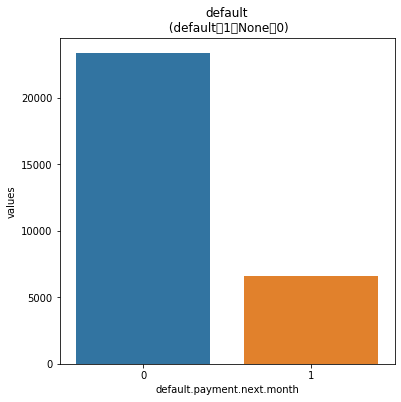

In [11]:
df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
plt.figure(figsize = (6,6))
plt.title('default\n (default：1，None：0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

#### define features and target

In [13]:
data.drop(['ID'],inplace=True,axis=1)
target=data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

#### split train data and test data

In [14]:
train_x,test_x,train_y,test_y = train_test_split(features,target,test_size=0.3,stratify = target,random_state=1)

#### classifiers

In [21]:
classifiers = [
    SVC(random_state=1,kernel='rbf'),
    DecisionTreeClassifier(random_state=1,criterion = 'gini'),
    RandomForestClassifier(random_state=1,criterion = 'gini'),
    KNeighborsClassifier(metric='minkowski'),
]

classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
]

classifier_param_grid =[
    {'svc__C':[1],'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth':[6,9,11]},
    {'randomforestclassifier__n_estimators':[3,5,6]},
    {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

In [22]:
def gridsearchcv_work(pipeline,train_x,train_y,test_x,test_y,param_grid,score='accuracy'):
    response ={}
    gridsearch=GridSearchCV(estimator = pipeline,param_grid=param_grid,scoring=score)
    search = gridsearch.fit(train_x,train_y)
    print('the best parameter:',search.best_params_)
    print('the best score:',search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print('accuracy:',accuracy_score(test_y,predict_y))
    response['predict_y']=predict_y
    response['accuracy_score']=accuracy_score(test_y,predict_y)
    return response

for model,model_name,model_param_grid in zip(classifiers,classifier_names,classifier_param_grid):
    pipeline=Pipeline(
    [('scaler',StandardScaler()),(model_name,model)]
    )
    result = gridsearchcv_work(pipeline,train_x,train_y,test_x,test_y,model_param_grid,score='accuracy')

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the best parameter: {'svc__C': 1, 'svc__gamma': 0.01}
the best score: 0.8173809523809524
accuracy: 0.8172222222222222


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the best parameter: {'decisiontreeclassifier__max_depth': 6}
the best score: 0.8186190476190476
accuracy: 0.8113333333333334


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the best parameter: {'randomforestclassifier__n_estimators': 6}
the best score: 0.7998095238095239
accuracy: 0.7994444444444444


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the best parameter: {'kneighborsclassifier__n_neighbors': 8}
the best score: 0.804047619047619
accuracy: 0.8035555555555556


In [24]:
from sklearn.ensemble import AdaBoostClassifier
pipeline=Pipeline(
    [('scaler',StandardScaler()),('AdaB',AdaBoostClassifier(random_state=1))]
    )
model_param_grid ={'AdaB__n_estimators':[10,50,100]}
result = gridsearchcv_work(pipeline,train_x,train_y,test_x,test_y,model_param_grid,score='accuracy')

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the best parameter: {'AdaB__n_estimators': 10}
the best score: 0.8186666666666667
accuracy: 0.8128888888888889
